# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [6]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


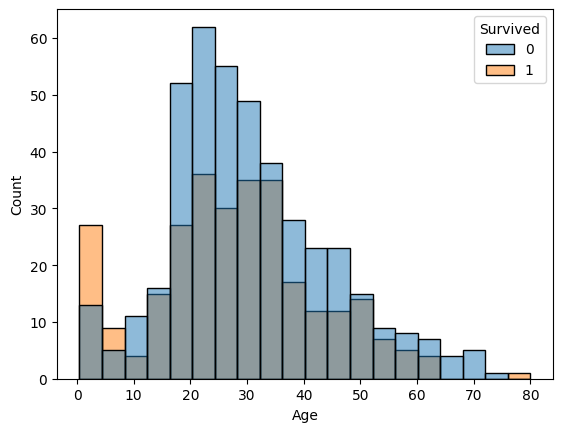

In [10]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='Age', data=df, hue='Survived')

plt.show()

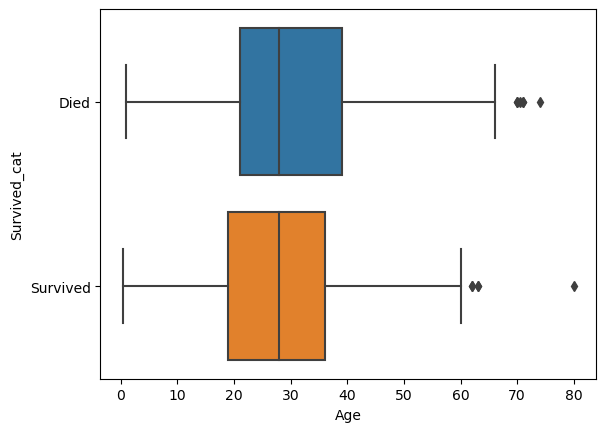

In [6]:
df.loc[df['Survived'] == 0, 'Survived_cat'] = 'Died'
df.loc[df['Survived'] == 1, 'Survived_cat'] = 'Survived'

sns.boxplot(x='Age', data=df, y='Survived_cat')
plt.show()

In [5]:
df['Survived'].dtype

dtype('int64')

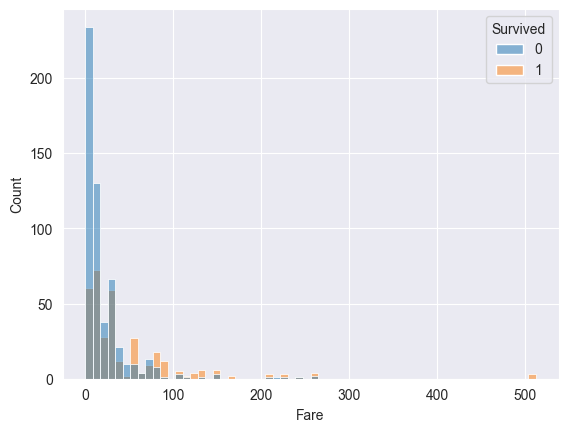

In [11]:
sns.histplot(x='Fare', data=df, hue='Survived')

plt.show()

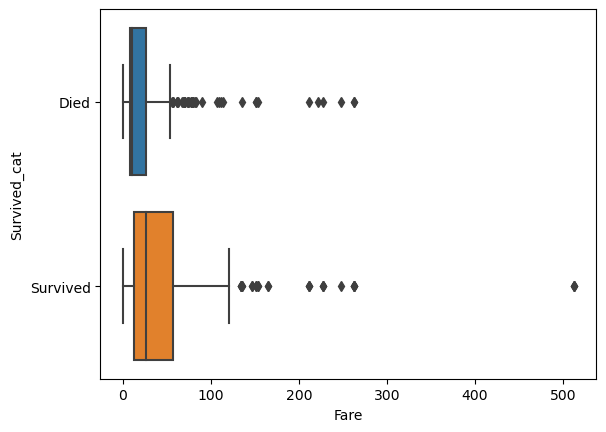

In [8]:
sns.boxplot(x='Fare', data=df, y='Survived_cat')

plt.show()

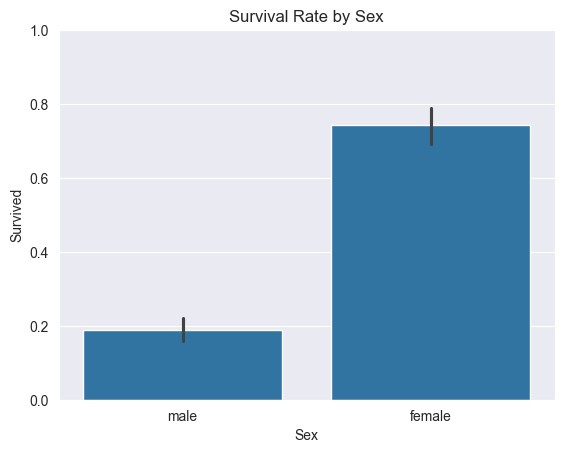

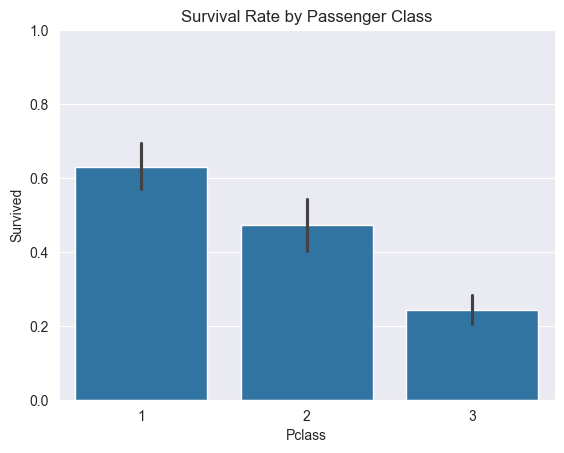

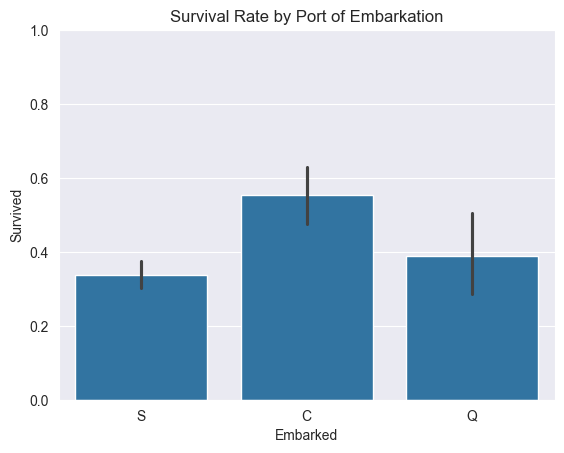

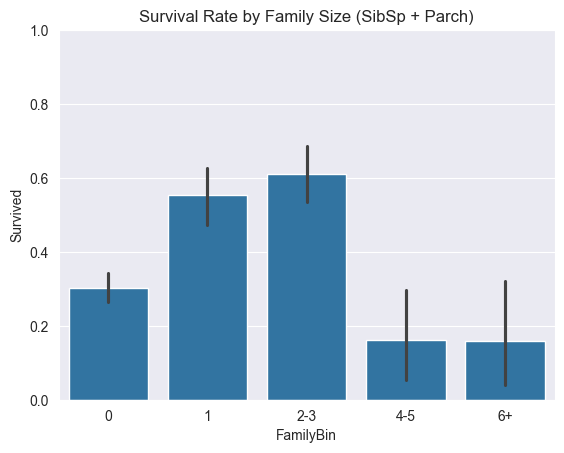

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# helper: family bins (if not already created earlier)
if "FamilySize" not in df.columns:
    df["FamilySize"] = df["SibSp"] + df["Parch"]
if "FamilyBin" not in df.columns:
    df["FamilyBin"] = pd.cut(df["FamilySize"], bins=[-1,0,1,3,5,10], labels=["0","1","2-3","4-5","6+"])

# Sex
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Sex")
plt.ylim(0,1); plt.show()

# Passenger Class
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylim(0,1); plt.show()

# Port of Embarkation
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Survival Rate by Port of Embarkation")
plt.ylim(0,1); plt.show()

# Family Size (binned)
sns.barplot(x="FamilyBin", y="Survived", data=df, order=["0","1","2-3","4-5","6+"])
plt.title("Survival Rate by Family Size (SibSp + Parch)")
plt.ylim(0,1); plt.show()


In [15]:
import numpy as np

ages_died = df.loc[df["Survived"]==0, "Age"].dropna()
ages_surv = df.loc[df["Survived"]==1, "Age"].dropna()
fare_died = df.loc[df["Survived"]==0, "Fare"].dropna()
fare_surv = df.loc[df["Survived"]==1, "Fare"].dropna()

summary_numbers = {
    "age_median": {"died": float(np.median(ages_died)), "survived": float(np.median(ages_surv))},
    "fare_median": {"died": float(np.median(fare_died)), "survived": float(np.median(fare_surv))},
    "rates": {
        "sex": df.groupby("Sex")["Survived"].mean().to_dict(),
        "pclass": df.groupby("Pclass")["Survived"].mean().to_dict(),
        "embarked": df.groupby("Embarked")["Survived"].mean().to_dict(),
        "family_bin": df.groupby("FamilyBin")["Survived"].mean().to_dict(),
        "overall": float(df["Survived"].mean()),
    },
}
summary_numbers


{'age_median': {'died': 28.0, 'survived': 28.0},
 'fare_median': {'died': 10.5, 'survived': 26.0},
 'rates': {'sex': {'female': 0.7420382165605095, 'male': 0.18890814558058924},
  'pclass': {1: 0.6296296296296297,
   2: 0.47282608695652173,
   3: 0.24236252545824846},
  'embarked': {'C': 0.5535714285714286,
   'Q': 0.38961038961038963,
   'S': 0.33695652173913043},
  'family_bin': {'0': 0.30353817504655495,
   '1': 0.5527950310559007,
   '2-3': 0.6106870229007634,
   '4-5': 0.16216216216216217,
   '6+': 0.16},
  'overall': 0.3838383838383838}}

### Character Profiles (backed by the plots above)

**Most likely to survive**
- Female, 1st class, embarked at Cherbourg (C)
- Traveling with a small family (2–3 total in SibSp+Parch)
- Paid a higher fare
- Rationale: Female survival is highest; 1st class > 2nd > 3rd; Cherbourg skewed higher survival; moderate family size performs best.

**Least likely to survive**
- Male, 3rd class, embarked at Southampton (S)
- Traveling alone or in a large family (4+)
- Low fare
- Rationale: Male survival is lowest; 3rd class is lowest; Southampton skewed lower; very small (0) or very large families underperform.

**Notes from the quantitative plots**
- Age distributions overlap, but survivors skew a bit younger; children show a bump.
- Median fare is higher for survivors, with more high-fare outliers.
